In [1]:
from keras.layers import SimpleRNN

In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [4]:

from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  
maxlen = 500 
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [5]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 16s 100ms/step - loss: 0.6468 - acc: 0.6037 - val_loss: 0.4670 - val_acc: 0.7924
Epoch 2/10
157/157 [==============================] - 15s 98ms/step - loss: 0.4056 - acc: 0.8224 - val_loss: 0.4184 - val_acc: 0.8132
Epoch 3/10
157/157 [==============================] - 15s 94ms/step - loss: 0.2854 - acc: 0.8854 - val_loss: 0.3616 - val_acc: 0.8440
Epoch 4/10
157/157 [==============================] - 15s 95ms/step - loss: 0.2291 - acc: 0.9111 - val_loss: 0.4033 - val_acc: 0.8408
Epoch 5/10
157/157 [==============================] - 21s 134ms/step - loss: 0.2005 - acc: 0.9216 - val_loss: 0.4136 - val_acc: 0.8378
Epoch 6/10
157/157 [==============================] - 16s 101ms/step - loss: 0.1298 - acc: 0.9555 - val_loss: 0.5852 - val_acc: 0.7706
Epoch 7/10
157/157 [==============================] - 15s 97ms/step - loss: 0.0818 - acc: 0.9743 - val_loss: 0.4836 - val_acc: 0.8354
Epoch 8/10
157/157 [==============================] - 16s 1

In [6]:
import matplotlib.pyplot as plt

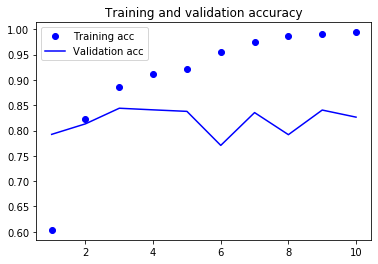

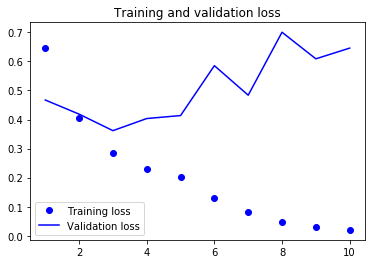

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 38s 241ms/step - loss: 0.5005 - acc: 0.7624 - val_loss: 0.3309 - val_acc: 0.8680
Epoch 2/10
157/157 [==============================] - 43s 277ms/step - loss: 0.2901 - acc: 0.8881 - val_loss: 0.4247 - val_acc: 0.8464
Epoch 3/10
157/157 [==============================] - 37s 233ms/step - loss: 0.2337 - acc: 0.9119 - val_loss: 0.3063 - val_acc: 0.8688
Epoch 4/10
157/157 [==============================] - 36s 228ms/step - loss: 0.1960 - acc: 0.9288 - val_loss: 0.2960 - val_acc: 0.8858
Epoch 5/10
157/157 [==============================] - 36s 229ms/step - loss: 0.1772 - acc: 0.9388 - val_loss: 0.2965 - val_acc: 0.8872
Epoch 6/10
157/157 [==============================] - 37s 233ms/step - loss: 0.1602 - acc: 0.9430 - val_loss: 0.3189 - val_acc: 0.8676
Epoch 7/10
157/157 [==============================] - 37s 234ms/step - loss: 0.1433 - acc: 0.9495 - val_loss: 0.3499 - val_acc: 0.8846
Epoch 8/10
157/157 [==============================] - 3

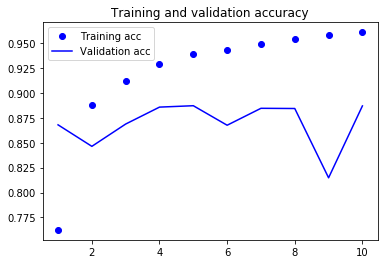

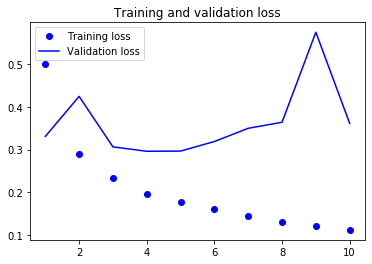

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()